In [5]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#Paquetes necesarios

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

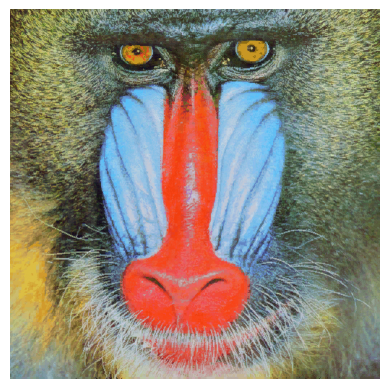

In [2]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #OpenCV lee las imágenes almacenando en formato BGR, por lo que se convierte a RGB para visualizarla de forma correcta
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.axis("off")                 #Eliminamos etiquetas de los ejes
    plt.imshow(img_rgb)             #Muestra la imagen tras convertir a RGB
    plt.show()
else: 
    print('Imagen no encontrada')

In [3]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()

NameError: name 'gris' is not defined

(512, 512)


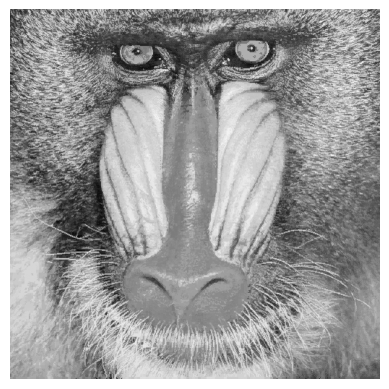

In [5]:
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

In [11]:
def countWhitePixels(matrix):    
    #Ejercicio resuelto con bucles
    row_white_pixel = [0] * len(matrix)                      # Lista que almacena la cuenta de los pixeles blancos por cada fila
    column_white_pixel = [0] * len(matrix[0])                # Lista que almacena la cuenta de los pixeles blancos por cada columna

    for i in range(len(matrix)):                             # Recorre la mátriz y cuenta los pixeles blancos que hay en cada fila y columna
        for j in range(len(matrix[i])):
            if matrix[i][j] == 255:
                row_white_pixel[i]+=1
                column_white_pixel[j]+=1

    row_max = max(row_white_pixel)                          # Selecciona el máximo de pixeles blancos en una fila
    column_max = max(column_white_pixel)                    # Selecciona el máximo de pixeles blancos en una columna

    print("Número máximo en filas:", row_max)
    print("Número máximo en columnas:", column_max)

    num_pixel95 = 0                                         # Recorre los valores de pixeles blancos en una cada fila y calcula cuantas filas superan o igualan 0.95*máximo de pixeles blancos en una fila
    for i in row_white_pixel:                               
        if (i >= (row_max*0.95)):
            num_pixel95 += 1


    print("Numero de filas con un número de píxeles blancos mayor o igual que 0.95*máximo:", num_pixel95)

-----CANNY-----
Número máximo en filas: 220
Número máximo en columnas: 187
Numero de filas con un número de píxeles blancos mayor o igual que 0.95*máximo: 2
-----SOBEL-----
Número máximo en filas: 39
Número máximo en columnas: 38
Numero de filas con un número de píxeles blancos mayor o igual que 0.95*máximo: 2


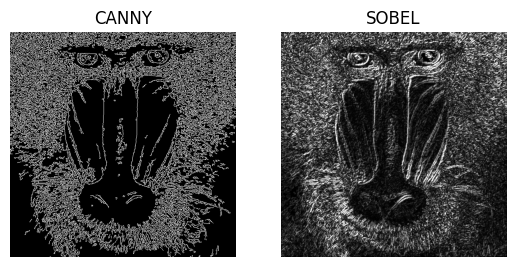

In [24]:

canny = cv2.Canny(gris, 100, 200)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

sobel_abs = cv2.convertScaleAbs(sobel)
print("-----CANNY-----")
countWhitePixels(canny)
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title('CANNY')

plt.imshow(canny, cmap='gray') 


print("-----SOBEL-----")
countWhitePixels(sobel_abs)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('SOBEL')
plt.imshow(sobel_abs, cmap='gray') 
plt.show()


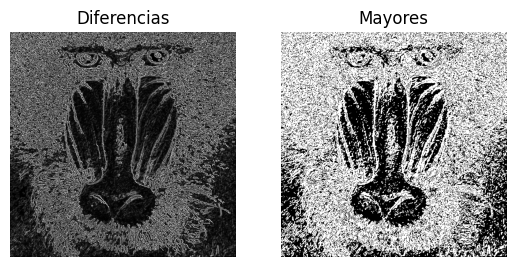

In [25]:
dif = cv2.absdiff(canny, sobel_abs)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [65]:
#codigo para mostrar bordes con sobel (nuestro favorito)

def showBorders(frame):
    newFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    newFrame = cv2.GaussianBlur(newFrame, (3, 3), 0)
    sobelx = cv2.Sobel(newFrame, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(newFrame, cv2.CV_64F, 0, 1)
    newFrame = cv2.add(sobelx, sobely)
    return newFrame

vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        
        cv2.imshow('Canny', showBorders(frame))
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

In [4]:
#codigo para mostrar bordes con canny

def showBorders(frame):
    newFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    newFrame = cv2.GaussianBlur(newFrame, (3, 3), 0)
    newFrame = cv2.Canny(newFrame, 100, 200)
    return newFrame

vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        
        cv2.imshow('Canny', showBorders(frame))
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [63]:

def create_square_mask(height, width, vertx1, vertx2, vertx3, vertx4):
    mask = np.zeros((height, width), dtype=np.uint8)
    pts = np.array([vertx1, vertx2, vertx3, vertx4], np.int32)
    cv2.fillConvexPoly(mask, pts, 255)
    return mask

def apply_square_mask(image, mask, channel, value):
    image[:, :, channel] = np.where(mask == 255, value, image[:, :, channel])

def apply_grayscale_mask(image, mask):
    gray_value = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    for channel in range(3):
        image[:, :, channel] = np.where(mask == 255, gray_value, image[:, :, channel])

# Iniciar la captura de vídeo
vid = cv2.VideoCapture(0)

# Leer el primer fotograma para obtener las dimensiones
frame = vid.read()[1]
height, width = frame.shape[0], frame.shape[1]

# Crear las máscaras para los cuatro cuadrantes
square_mask1 = create_square_mask(height, width, [0, 0], [width // 2, 0], [width // 2, height // 2], [0, height // 2])
square_mask2 = create_square_mask(height, width, [width // 2, 0], [width, 0], [width, height // 2], [width // 2, height // 2])
square_mask3 = create_square_mask(height, width, [0, height // 2], [width // 2, height // 2], [width // 2, height], [0, height])
square_mask4 = create_square_mask(height, width, [width // 2, height // 2], [width, height // 2], [width, height], [width // 2, height])

# Bucle para procesar cada fotograma
while(True):      
    # Leer fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplicar las máscaras a los diferentes cuadrantes y canales
        apply_square_mask(frame, square_mask1, 1, 0)  # azul
        apply_square_mask(frame, square_mask1, 2, 0)   # azul
        apply_square_mask(frame, square_mask2, 0, 0)  # verde
        apply_square_mask(frame, square_mask2, 2, 0)  # verde
        apply_square_mask(frame, square_mask3, 0, 0)  # rojo
        apply_square_mask(frame, square_mask3, 1, 0)  # rojo
        apply_grayscale_mask(frame, square_mask4) # gris

        # Mostrar el fotograma modificado
        cv2.imshow('Colors', frame)
    
    # Detener el bucle con la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar la captura de vídeo y cerrar ventanas
vid.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [16]:
#codigo para mostrar bordes con sobel (nuestro favorito)

mask_total = None


def showBorders(frame):
    imgrgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imghsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #Máscara rango rojo y extracción desde imgrgb
    mask = cv2.inRange(imghsv, (5, 150, 130), (12, 255, 255))
    imgmasked = cv2.bitwise_and(frame, frame, mask=mask)
    #Máscara inversa (sin rojo) y extracción desde gris
    mask_inv = cv2.bitwise_not(mask)
    background = cv2.bitwise_and(gris, gris, mask = mask_inv)
    #Convierte a tres canales y combina
    background = cv2.merge([background,background,background])
    newFrame = cv2.add(imgmasked, background)
    return newFrame

vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        
        cv2.imshow('Canny', showBorders(frame))
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()